# Student Performance Indicator

## Life Cycle of a Machine Learning Project
* 1.Understanding the problem statement
* 2.Data collection
* 3.Data checks to perform
* 4.Exploratory data analysis
* 5.Data preprocessing
* 6.Model training
* 7.Choose best model

### Problem Statement
* This project understands how the student's preformance (test scores) is affected by other vairables such as Gender, Ethinicity, Parental level of education, Lunch and Test preparation course.

### Data Collection
* Dataset Source-> https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
* The dataset consists of 8 cols and 1000 rows.

## Import data and required packages
### importing pandas, numpy, matplotlib, seaborn and warning library.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Import csv data as pandas dataframe

In [2]:
df = pd.read_csv('data/stud.csv')
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
df.shape

(1000, 8)

### Dataset information

*   gender : sex of students -> (Male/female)
*   race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
*   parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
*   lunch : having lunch before test (standard or free/reduced)
*   test preparation course : complete or not complete before test
*   math score
*   reading score
*   writing score

### Data check to perform
*   Check missing values
*   Check duplicates
*   Check data type
*   Check no of unique values of each col
*   Check statistics of dataset
*   Check various categories present in the different categorical col

#### Check missing values

In [4]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

There are no missing values in the dataset.

#### Check duplicates

In [5]:
df.duplicated().sum()

0

There are no duplicates in the dataset

#### Check datatypes

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


#### Check no of unique values of each col

In [7]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

#### Check statistics of the dataset

In [8]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


#### Insight
*   From the above desribtion of numerical data, all means are very close to each other (66-68).
*   All std deviations are also close (14-15).
*   While there is a min score of 0 for math, scores of others bit higher than that.

## Exploring data

In [9]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [10]:
print("Categories in gender variable: ",end=" ")
print(df.gender.unique())

print("Categories in race_ethinicity variable: ",end=" ")
print(df.race_ethnicity.unique())

print("Categories in parental_level_of_education variable: ",end=" ")
print(df.parental_level_of_education.unique())

print("Categories in lunch variable: ",end=" ")
print(df.lunch.unique())

print("Categories in test_preparation_course variable: ",end=" ")
print(df.test_preparation_course.unique())

Categories in gender variable:  ['female' 'male']
Categories in race_ethinicity variable:  ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in parental_level_of_education variable:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in lunch variable:  ['standard' 'free/reduced']
Categories in test_preparation_course variable:  ['none' 'completed']


In [11]:
# define categorical & numerical columns
numerical_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

print("We have {} numerical features: {}".format(len(numerical_features),numerical_features))
print("We have {} categorical features: {}".format(len(categorical_features),categorical_features))

We have 3 numerical features: ['math_score', 'reading_score', 'writing_score']
We have 5 categorical features: ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [12]:
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


#### Adding columns for Total Score and Average

In [13]:
df['total_score'] = df['math_score']+df['reading_score']+df['writing_score']
df['average'] = df['total_score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [14]:
reading_full = df[df['reading_score']==100]['average'].count()
writing_full = df[df['writing_score']==100]['average'].count()
math_full = df[df['math_score']==100]['average'].count()

print(f'Number of students with full marks in reading: {reading_full}')
print(f'Number of students with full matks in writing: {writing_full}')
print(f'Number of studdents with full marks in math: {math_full}')

Number of students with full marks in reading: 17
Number of students with full matks in writing: 14
Number of studdents with full marks in math: 7


In [15]:
reading_less_20 = df[df['reading_score']<20]['average'].count()
writing_less_20 = df[df['writing_score']<20]['average'].count()
math_less_20 = df[df['math_score']<20]['average'].count()

print(f'Number of students with less than 20 marks in reading: {reading_less_20}')
print(f'Number of students with less than 20 marks in writing: {writing_less_20}')
print(f'Number of students with less than 20 marks in maths: {math_less_20}')

Number of students with less than 20 marks in reading: 1
Number of students with less than 20 marks in writing: 3
Number of students with less than 20 marks in maths: 4


#### Insights
*   Students have performed worst in maths
*   Best performance is in reading section

## Exploring Data (visualization)

Visualize average score distribution to make some conclusion.
*   Histogram
*   Kernal Distribution Function (KDE)

#### Histogram & KDE

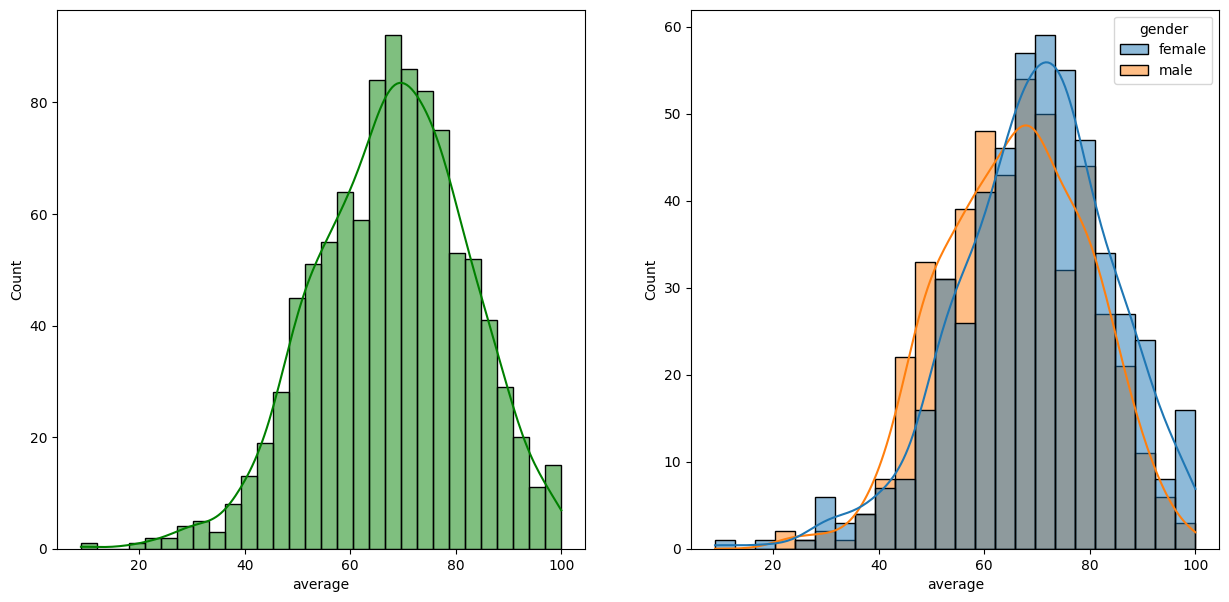

In [16]:
fig,axs = plt.subplots(1,2,figsize = (15,7))
plt.subplot(121)
sns.histplot(data=df,x='average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average',kde=True,hue='gender')
plt.show()

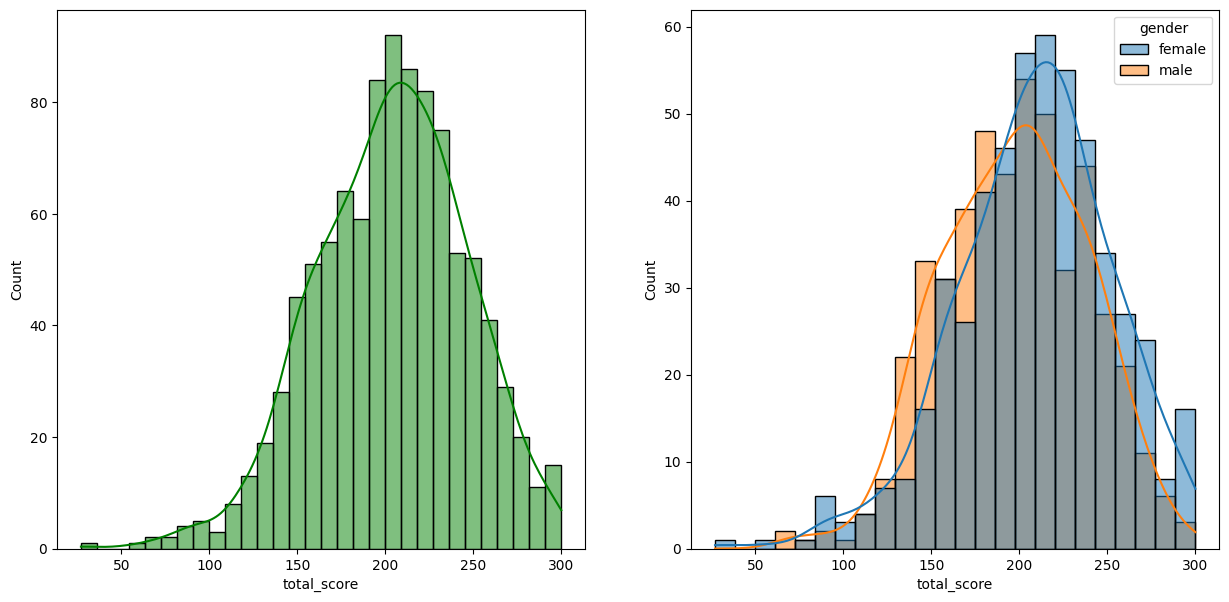

In [17]:
fig,axs = plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='total_score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='total_score',kde=True,hue='gender')
plt.show()

#### Insights

*   Female students tend to perform well than male students.

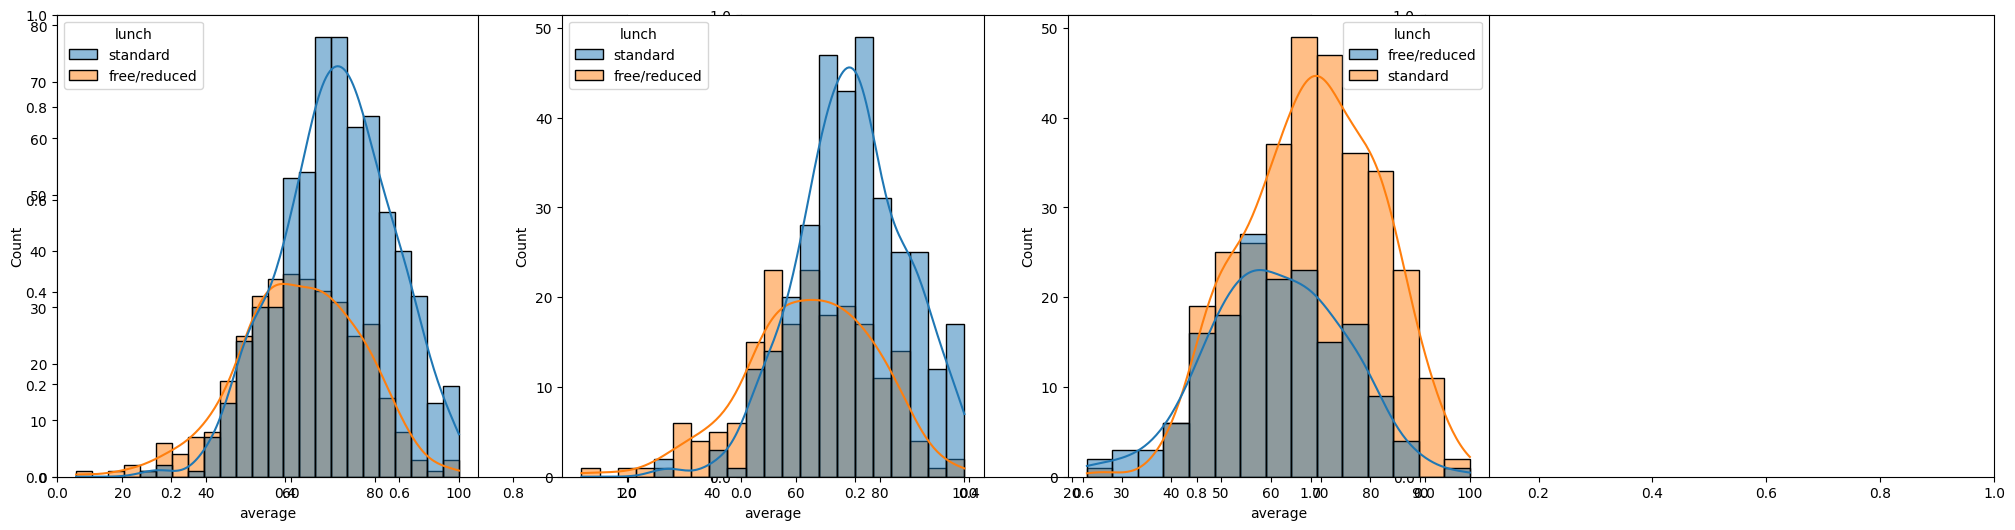

In [20]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='lunch')
plt.show()

#### Insights
*   Standard lunch helps to perform well in exams.
*   Standard lunch hleps to perform well in exams be in male or female.

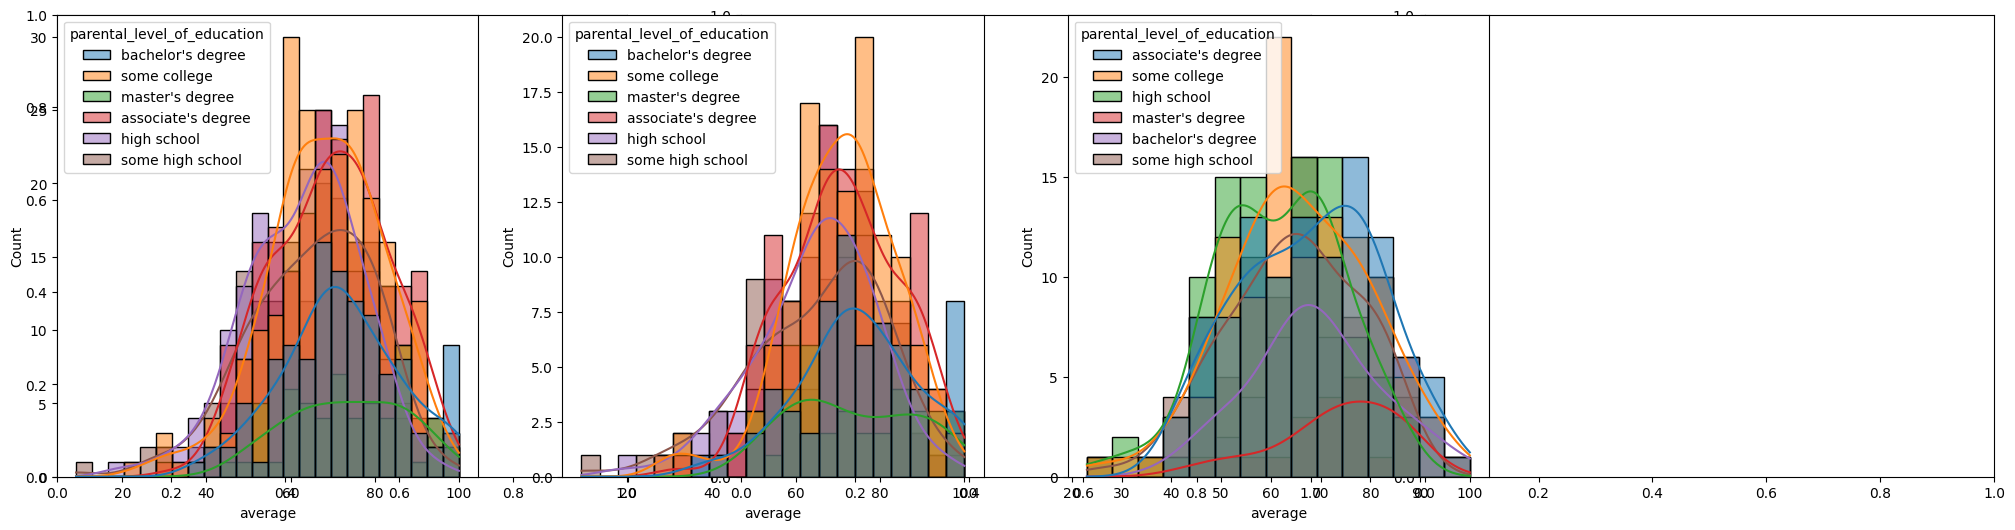

In [23]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='parental_level_of_education')
plt.subplot(142)
sns.histplot(data=df[df.gender == 'female'],x='average',kde=True,hue='parental_level_of_education')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='parental_level_of_education')
plt.show()

#### Insights

*   In general parent's level of education does not help the students to perform well in exams.
*   In the second plot parent's level of education does not help female students to perform well in exams.
*   In the third plot parent's level of education influenced male students to perform well in exams.


[]

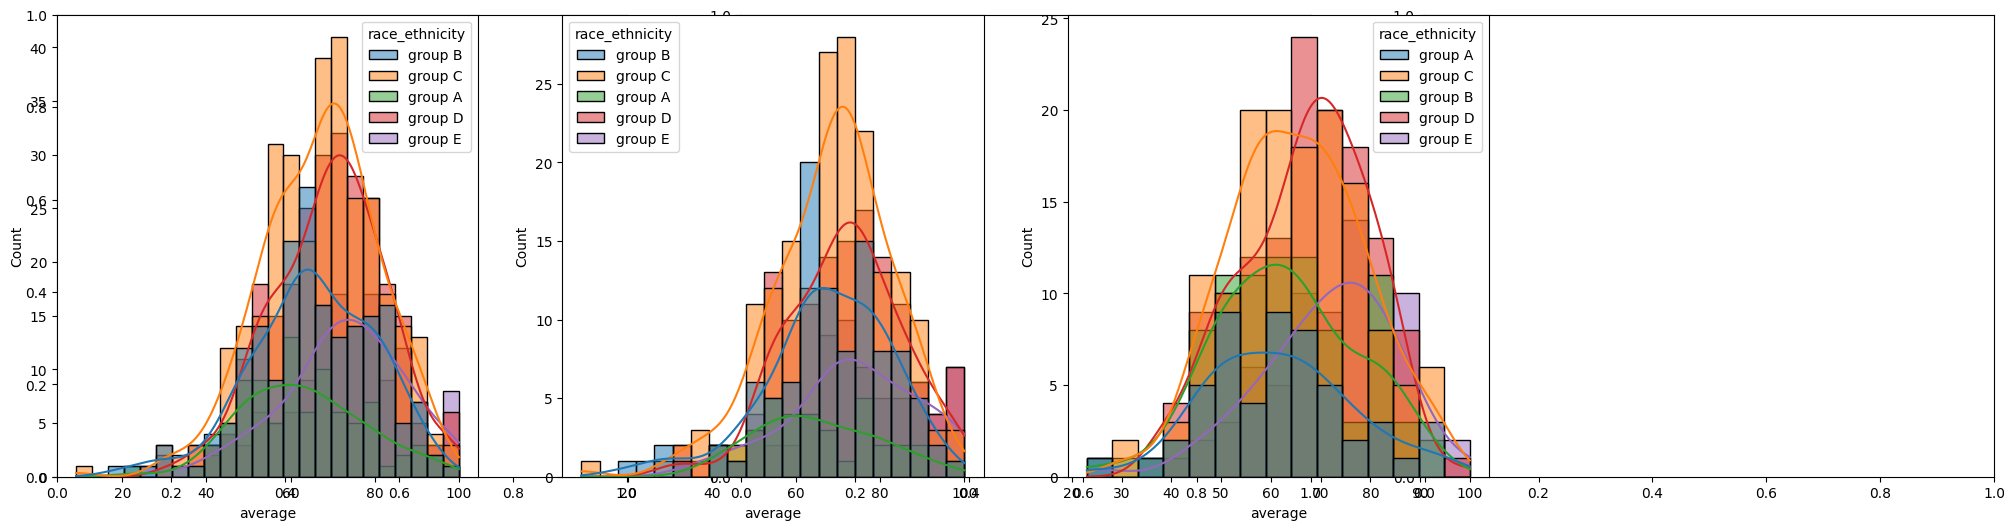

In [27]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='race_ethnicity')
plt.subplot(142)
sns.histplot(data=df[df.gender == 'female'],x='average',kde=True,hue='race_ethnicity')
plt.subplot(143)
sns.histplot(data=df[df.gender == 'male'],x='average',kde=True,hue='race_ethnicity')
plt.plot()

#### Insights

*   Students of group A and B tends to perform poor in exams.
*   Students of group A and B tends to perform poor in exams irrespective of male or female.

### Maximum score of students in all 3 subjects

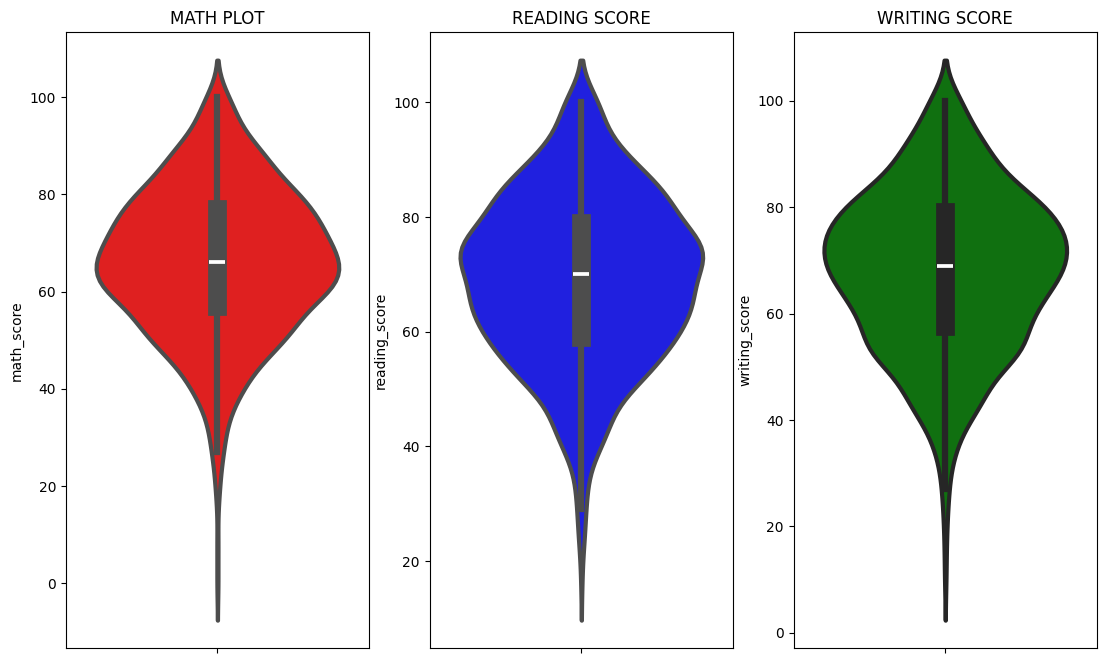

In [28]:
plt.figure(figsize = (18,8))
plt.subplot(1,4,1)
plt.title('MATH PLOT')
sns.violinplot(y='math_score',data=df,color='red',linewidth=3)
plt.subplot(1,4,2)
plt.title('READING SCORE')
sns.violinplot(y='reading_score',data=df,color='blue',linewidth=3)
plt.subplot(1,4,3)
plt.title('WRITING SCORE')
sns.violinplot(y='writing_score',data=df,color='green',linewidth=3)
plt.show()

#### Insights
*   From the above plots it is clear that for maths most of the students got marks between 60-80. But reading and writing most scored between 50-80.

### Multivariate analysis using pieplot

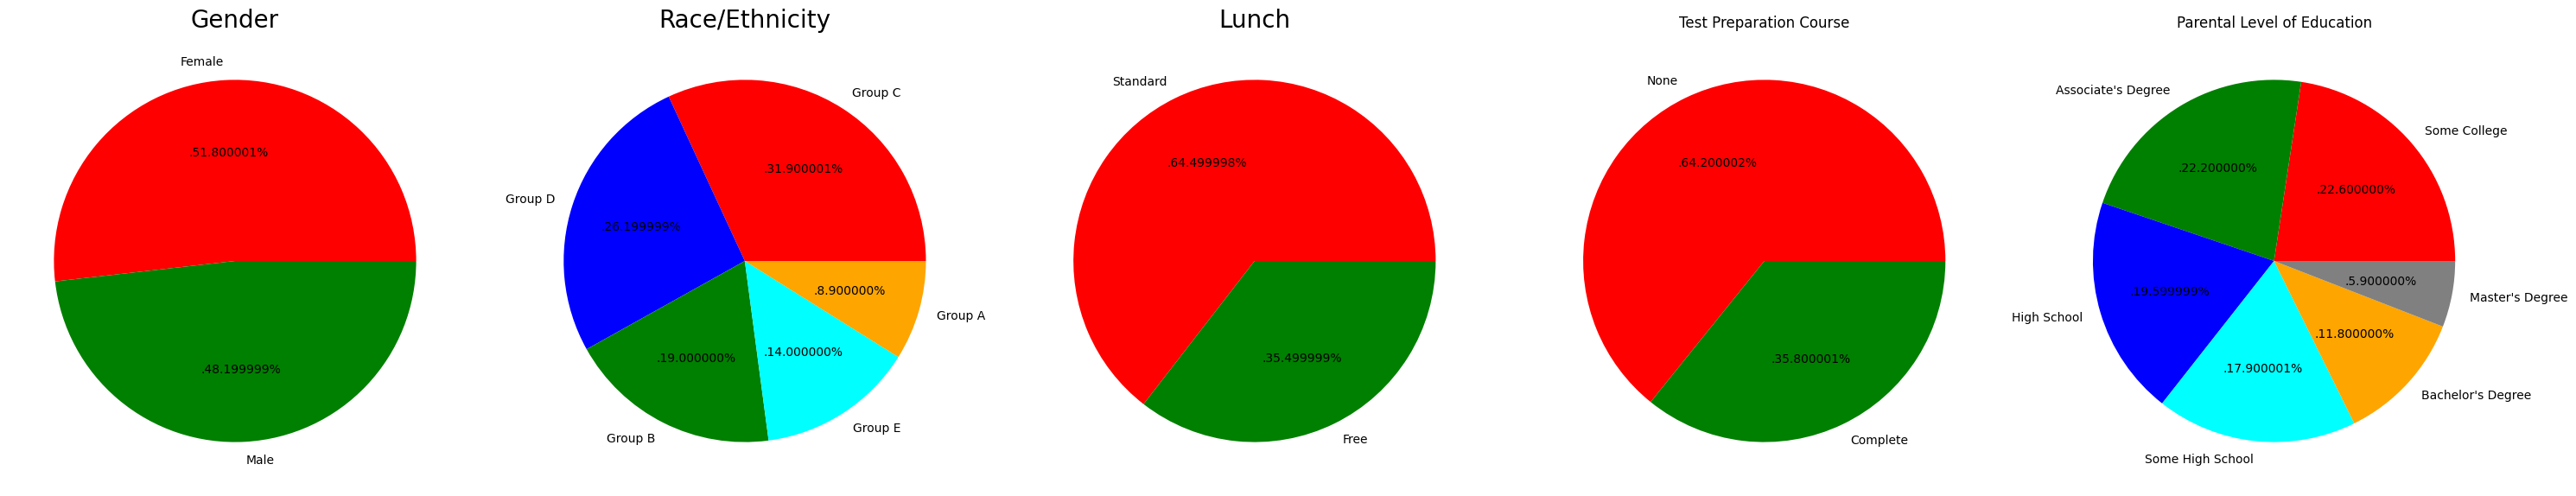

In [44]:
plt.rcParams['figure.figsize'] = (30,12)

plt.subplot(1,5,1)
size = df['gender'].value_counts()
labels = 'Female','Male'
color = ['red','green']

plt.pie(size,colors=color,labels=labels,autopct='.%2f%%')
plt.title('Gender',fontsize=20)
plt.axis('off')

plt.subplot(1,5,2)
size = df['race_ethnicity'].value_counts()
labels = 'Group C','Group D','Group B','Group E','Group A'
color = ['red','blue','green','cyan','orange']

plt.pie(size,colors=color,labels=labels,autopct='.%2f%%')
plt.title('Race/Ethnicity',fontsize=20)
plt.axis('off')

plt.subplot(1,5,3)
size = df['lunch'].value_counts()
labels = 'Standard','Free'
color = ['red','green']

plt.pie(size,colors = color,labels=labels,autopct='.%2f%%')
plt.title('Lunch',fontsize=20)
plt.axis('off')

plt.subplot(1,5,4)
size = df['test_preparation_course'].value_counts()
labels = 'None','Complete'
color = ['red','green']

plt.pie(size,colors = color,labels = labels,autopct='.%2f%%')
plt.title('Test Preparation Course')
plt.axis('off')

plt.subplot(1,5,5)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College',"Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red','green','blue','cyan','orange','grey']

plt.pie(size,colors = color,labels=labels,autopct='.%2f%%')
plt.title('Parental Level of Education')
plt.axis('off')

plt.tight_layout()
plt.grid()

plt.show()

#### Insights
*   Male and Female counts are almost equal.
*   Most people belong to the group C.
*   Most people had a std lunch.
*   Most students didnt complete the test course.
*   Parental level of education is higher for some college followed by associate's degree.

### Feature wise visualization
#### Gender Column
*   How is distribution of gender?
*   Is gender has any impact on student scores?

##### Univariate Analysis (How is distribution of gender?)

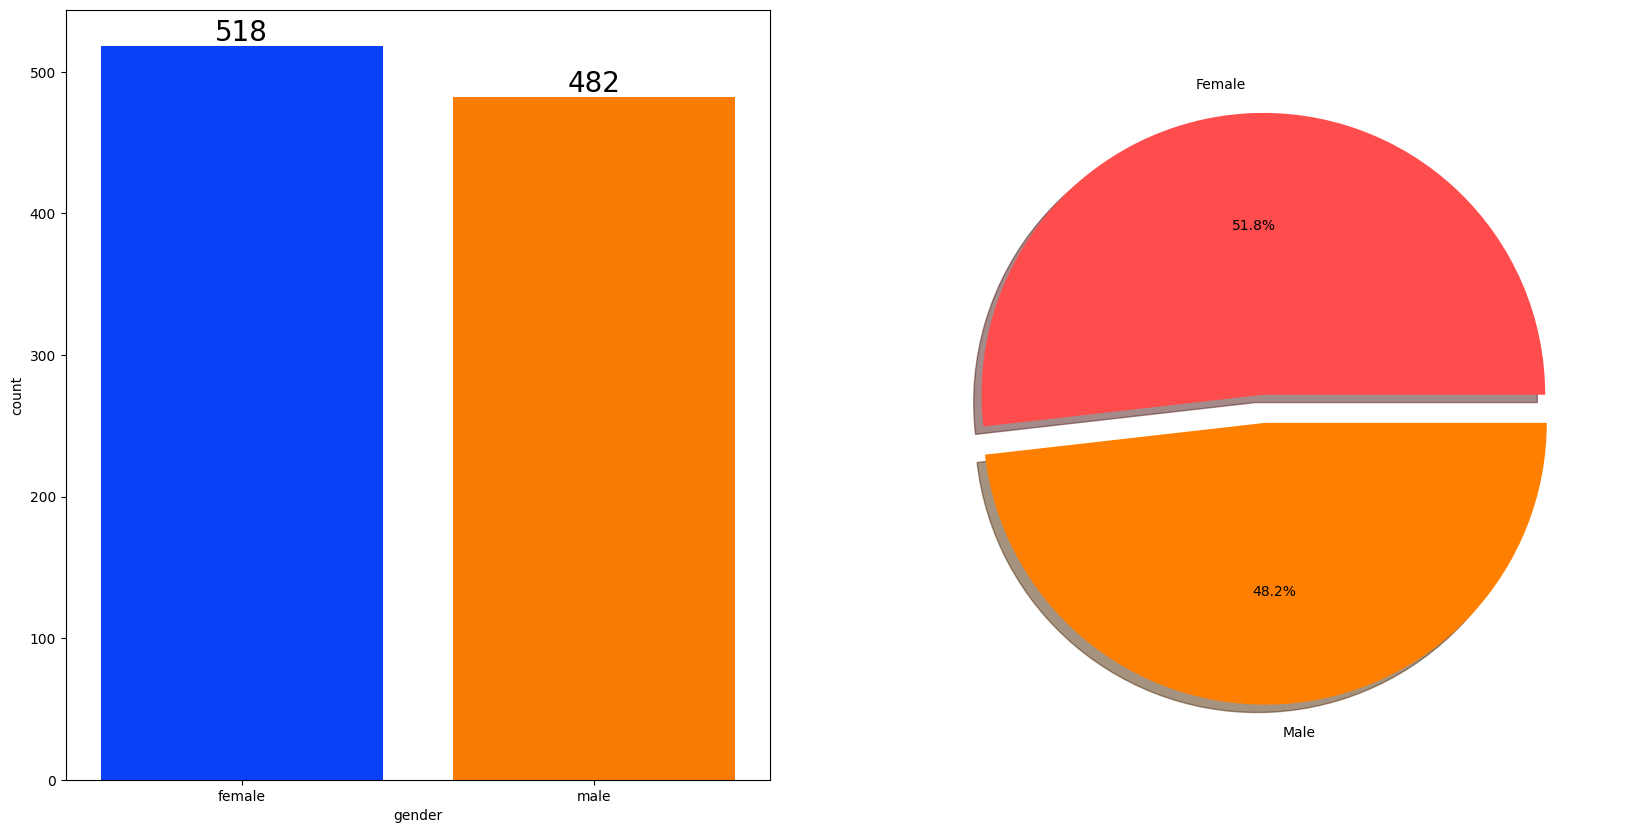

In [60]:
f,ax = plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)

plt.pie(x=df['gender'].value_counts(),labels=['Female','Male'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

#### Insights
*   Gender has balanced data with 48% male and 51% female.

##### Bivariate Analysis (Does gender has any impact on student performance?)

In [65]:
gender_group = df.groupby('gender').mean()
gender_group

,math_score,reading_score,writing_score,total_score,average
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


[-0.2  0.8]


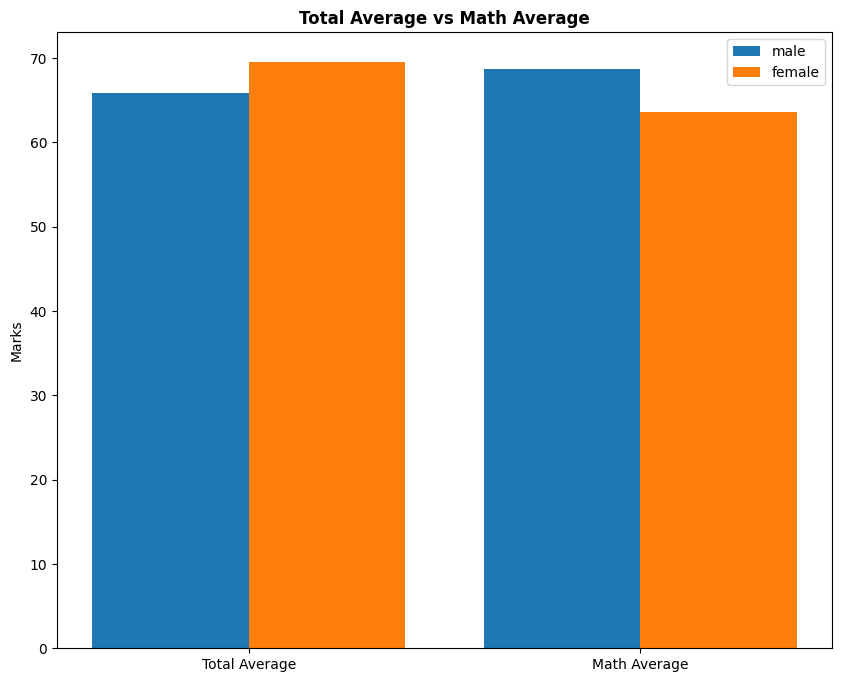

In [76]:
plt.figure(figsize=(10,8))
X = ['Total Average','Math Average']

female_scores = [gender_group['average'][0],gender_group['math_score'][0]]
male_scores = [gender_group['average'][1],gender_group['math_score'][1]]

X_axis = np.arange(len(X))
print(X_axis-0.2)

plt.bar(X_axis - 0.2,male_scores,0.4,label='male')
plt.bar(X_axis + 0.2,female_scores,0.4,label='female')

plt.xticks(X_axis,X)
plt.ylabel('Marks')
plt.title('Total Average vs Math Average',fontweight="bold")
plt.legend()
plt.show()

#-0.2 to 0.2, 0.8 to 1.2
#0.2 to 0.6, 1.2 to 1.6


#### Insights
*   On average female performed better.
*   On math male students got better scores then female.

#### Race/Ethnicity Column
*   How is its group wise distribution?
*   Is race/ethnicity has any impact on student scores?

#### Univariable Analysis (How is it distributed?)

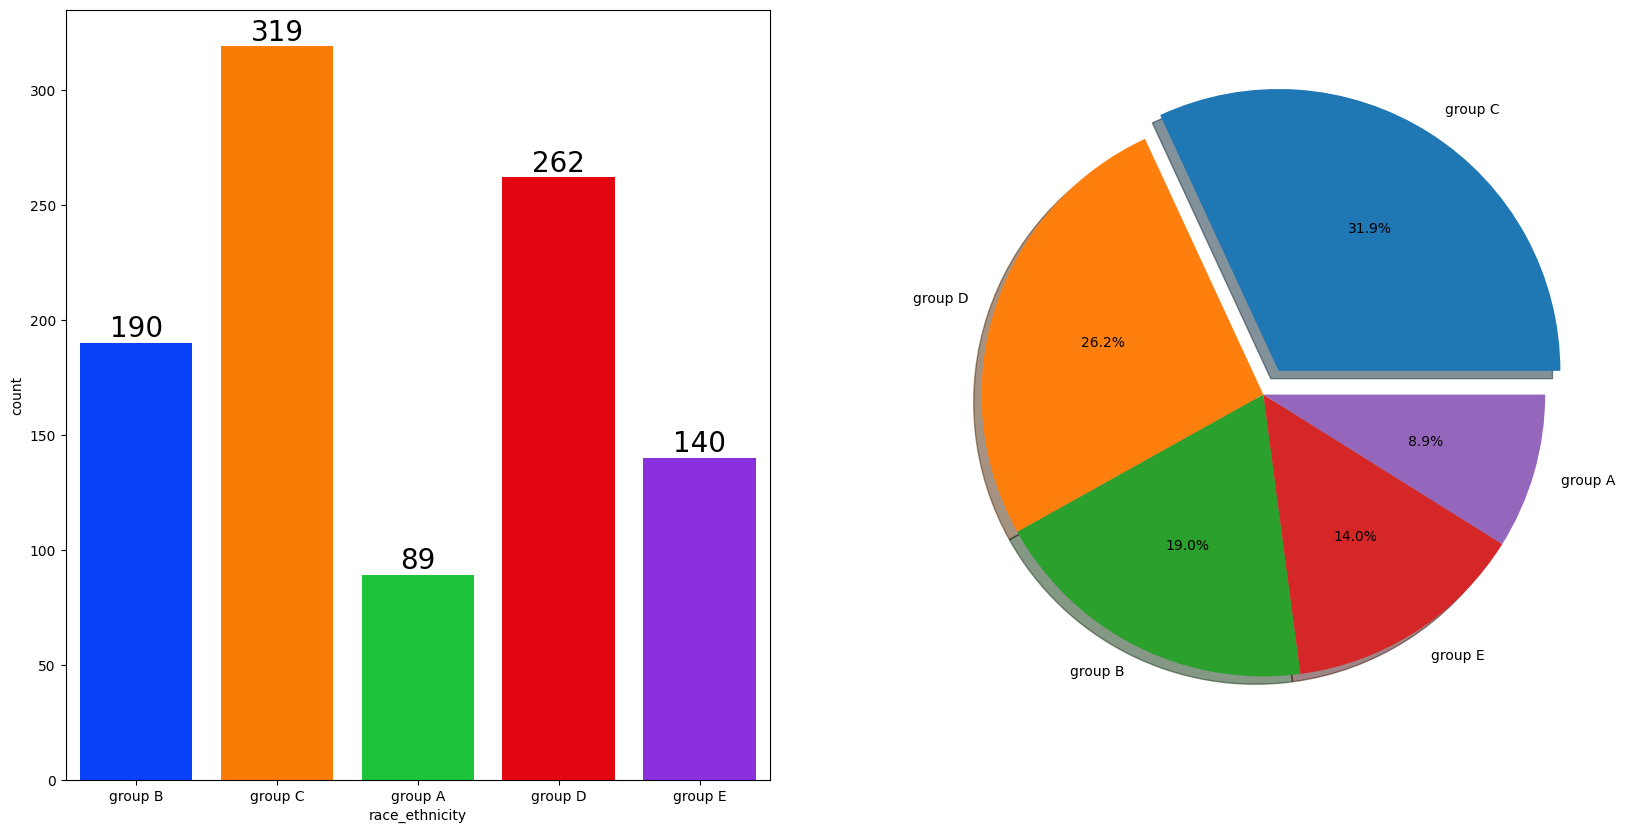

In [78]:
f,ax= plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['race_ethnicity'],data=df,palette='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)

plt.pie(x=df['race_ethnicity'].value_counts(),labels=df['race_ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()

#### Insights
*   Most of the students belong to Group C or D.
*   Group A has the lowest no of students.

#### Bivariate Analysis (Does race/ethnicity has any impact on student performance?)


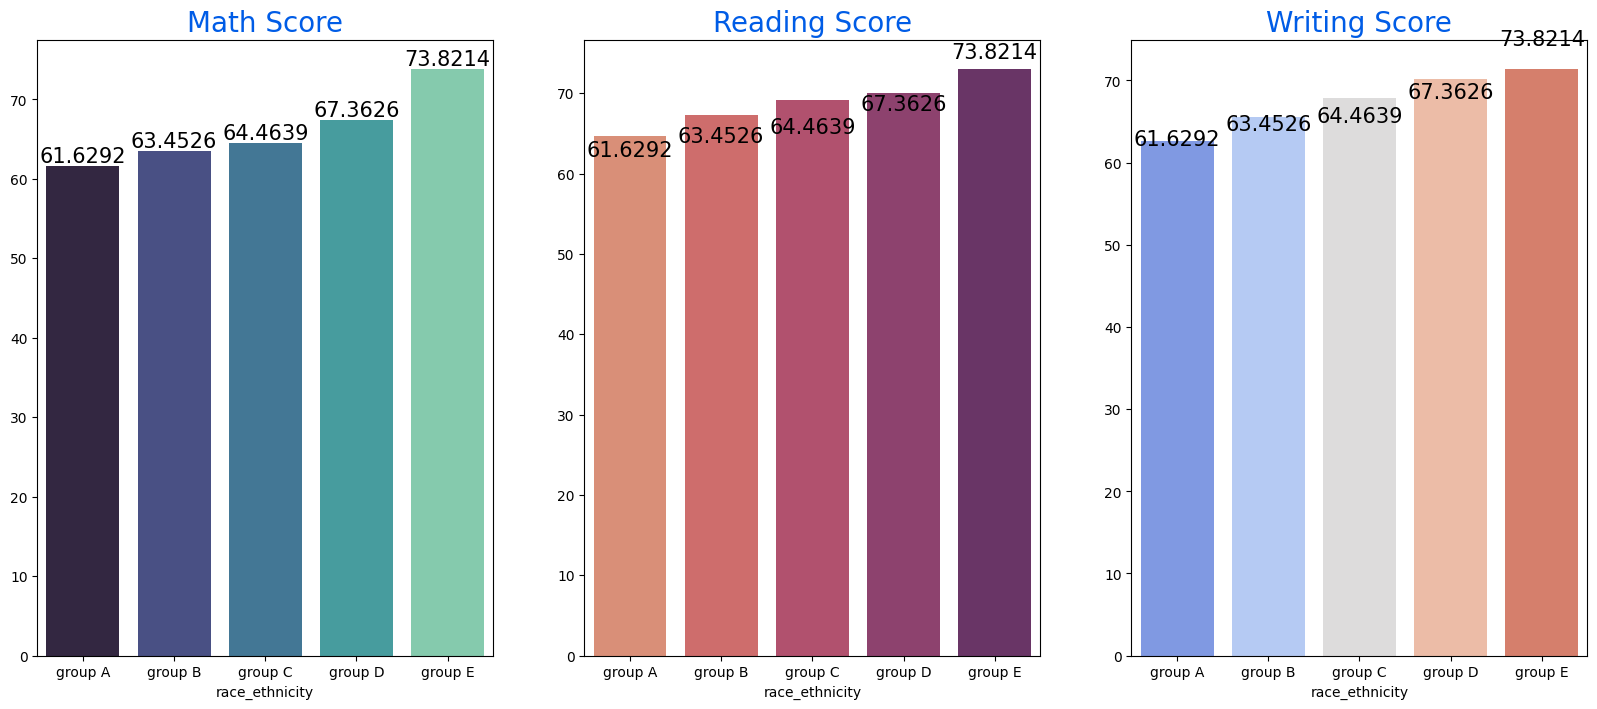

In [84]:
group_data = df.groupby('race_ethnicity')
f,ax= plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=group_data['math_score'].mean().index,y=group_data['math_score'].mean().values,palette='mako',ax=ax[0])
ax[0].set_title('Math Score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=group_data['reading_score'].mean().index,y=group_data['reading_score'].mean().values,palette='flare',ax=ax[1])
ax[1].set_title('Reading Score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=group_data['writing_score'].mean().index,y=group_data['writing_score'].mean().values,palette='coolwarm',ax=ax[2])
ax[2].set_title('Writing Score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[2].bar_label(container,color='black',size=15)


#### Insights
*   Students from group E scored most marks in all 3 subjects.
*   Students from group A scored the least in all 3 subjects.
*   Students from lower socio-economic status scored less in all 3 subjects.

#### Parental Level of Education Column 

*   What is the educational background of student's parent?
*   Does it have any impact on the student performance?

#### Univariate Analysis (What is the educational background of student's parent?)

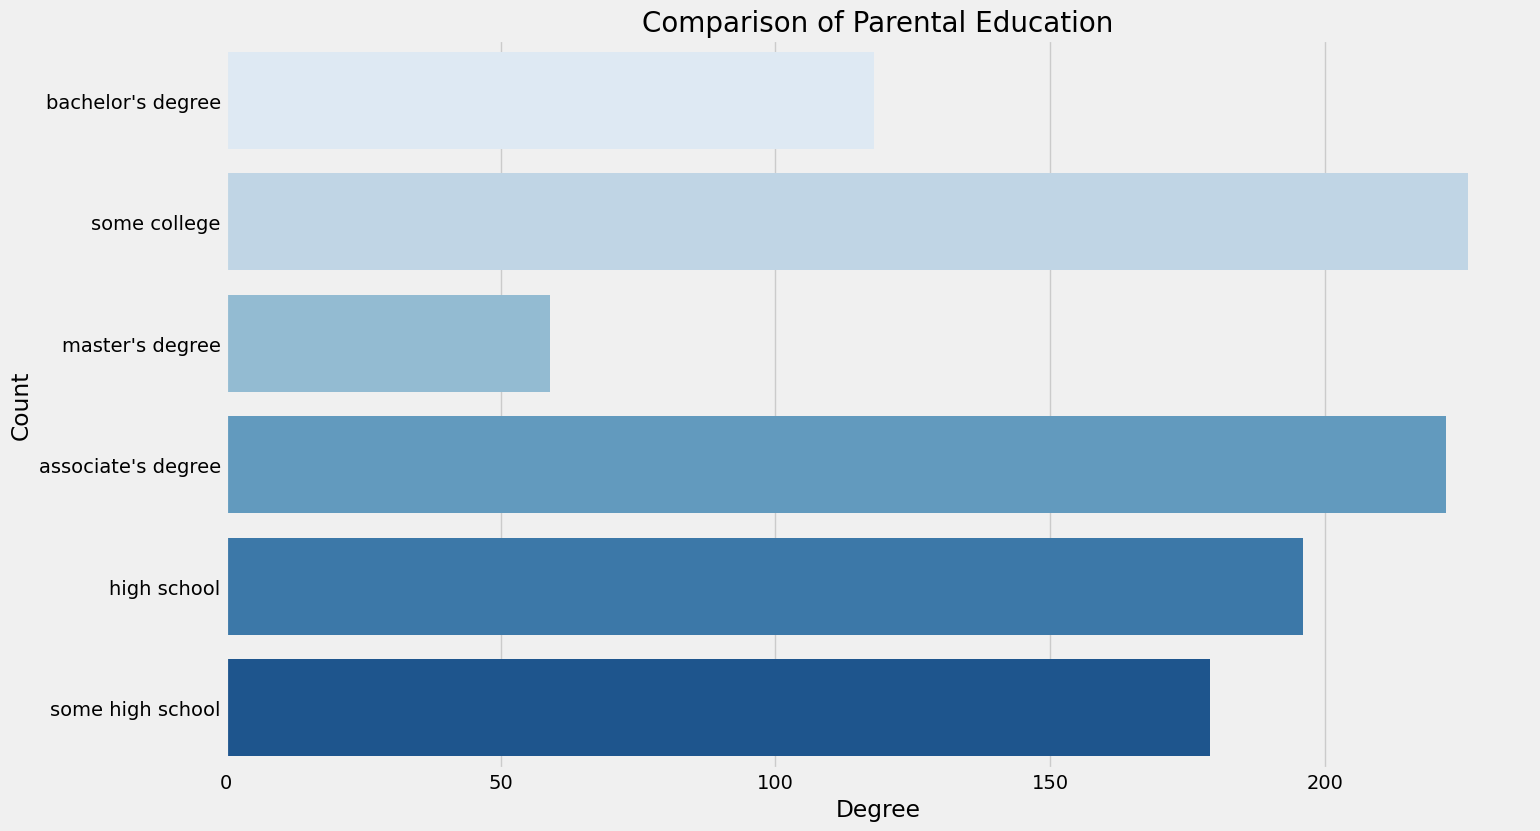

In [85]:
plt.rcParams['figure.figsize'] = (15,9)
plt.style.use("fivethirtyeight")
sns.countplot(df['parental_level_of_education'],palette='Blues')
plt.title('Comparison of Parental Education',fontweight=30,fontsize=20)
plt.xlabel('Degree')
plt.ylabel('Count')
plt.show()

#### Insights
*   Largest no of parents are from some college.

#### Bivariate Analysis (Does parental education has any impact on student performance?)


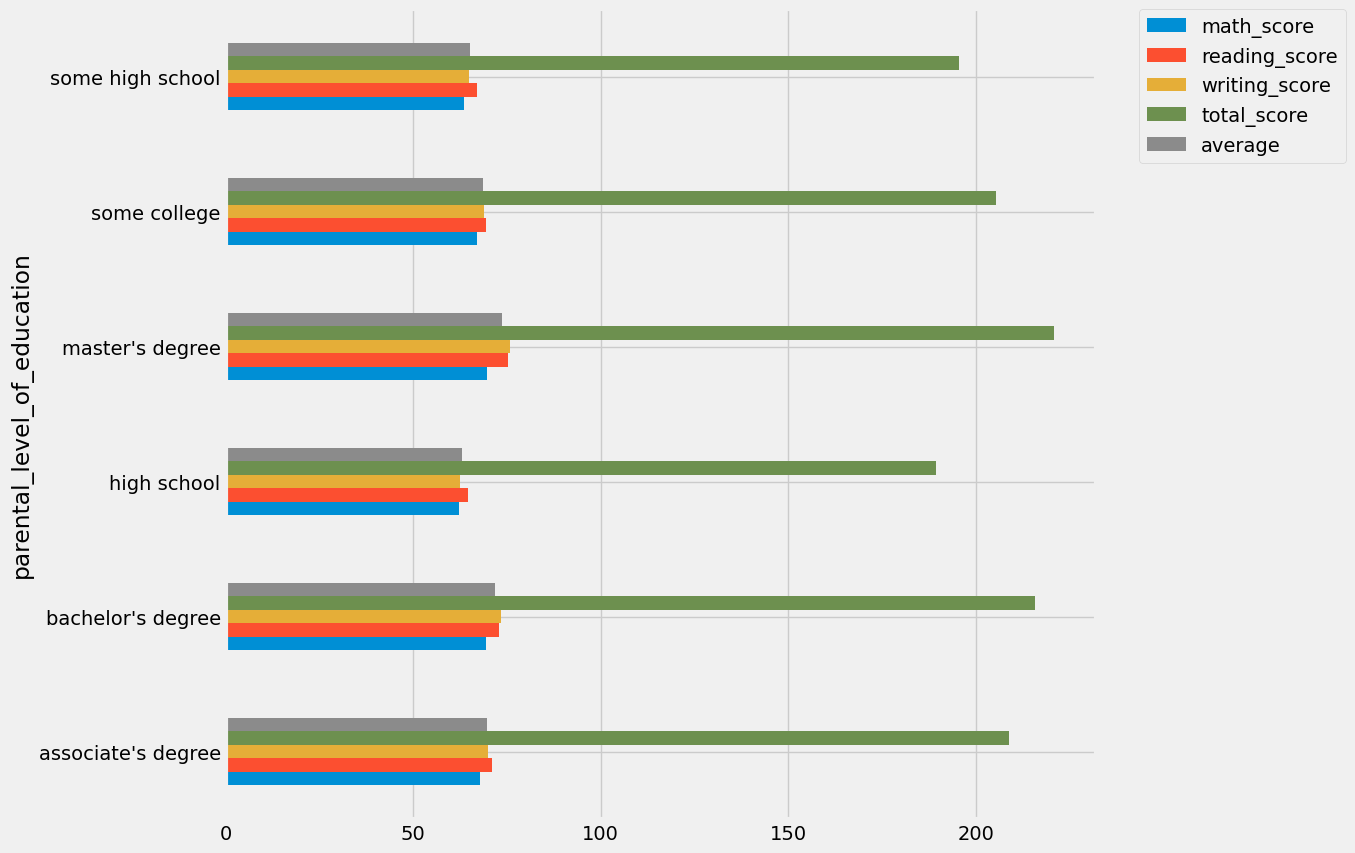

In [87]:
df.groupby('parental_level_of_education').agg('mean').plot(kind='barh',figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0.)
plt.show()

#### Insights
*   The performance of student whose parents have masters and bachelors degree are better than others.

#### Lunch Column
*   Which type of lunch is most common among students?
*   What is the effect of lunch type on student performance?

##### Univariate Analysis (Which type of lunch is most common among students?)

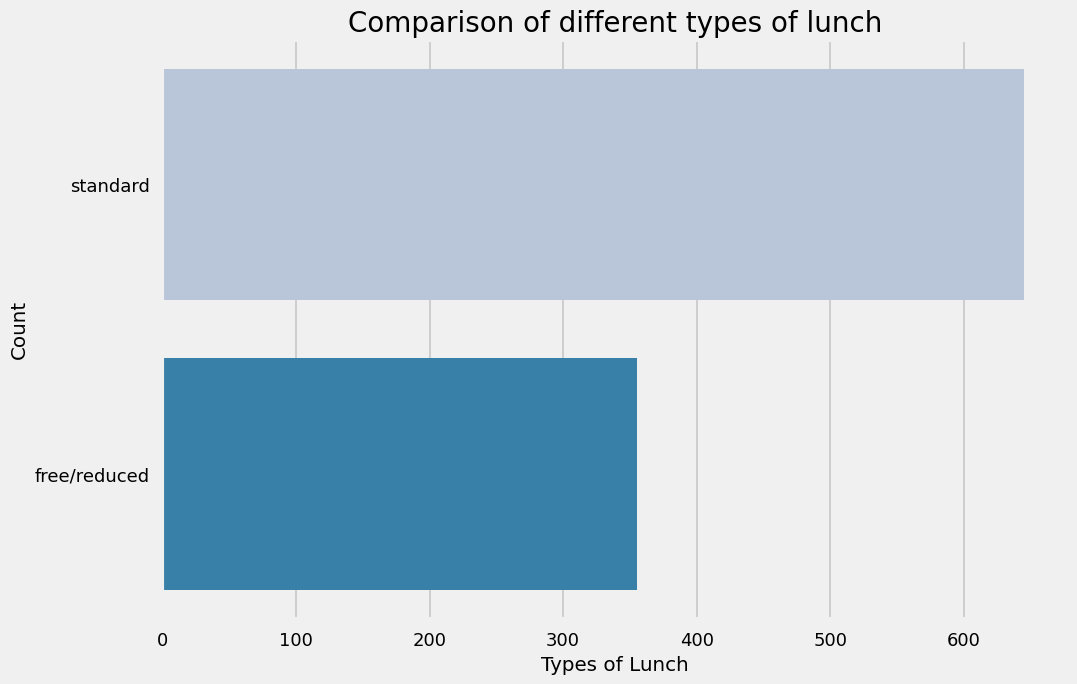

In [90]:
plt.rcParams['figure.figsize'] = (15,9)
plt.style.use('seaborn-v0_8-talk')
sns.countplot(df['lunch'],palette='PuBu')
plt.title('Comparison of different types of lunch',fontweight=30,fontsize=20)
plt.xlabel('Types of Lunch')
plt.ylabel('Count')
plt.show()

#### Insights
*   Students being served with a standard lunch was more than free lunch.

#### Multivariable Analysis (Does lunch intake has any impact on student performance?)

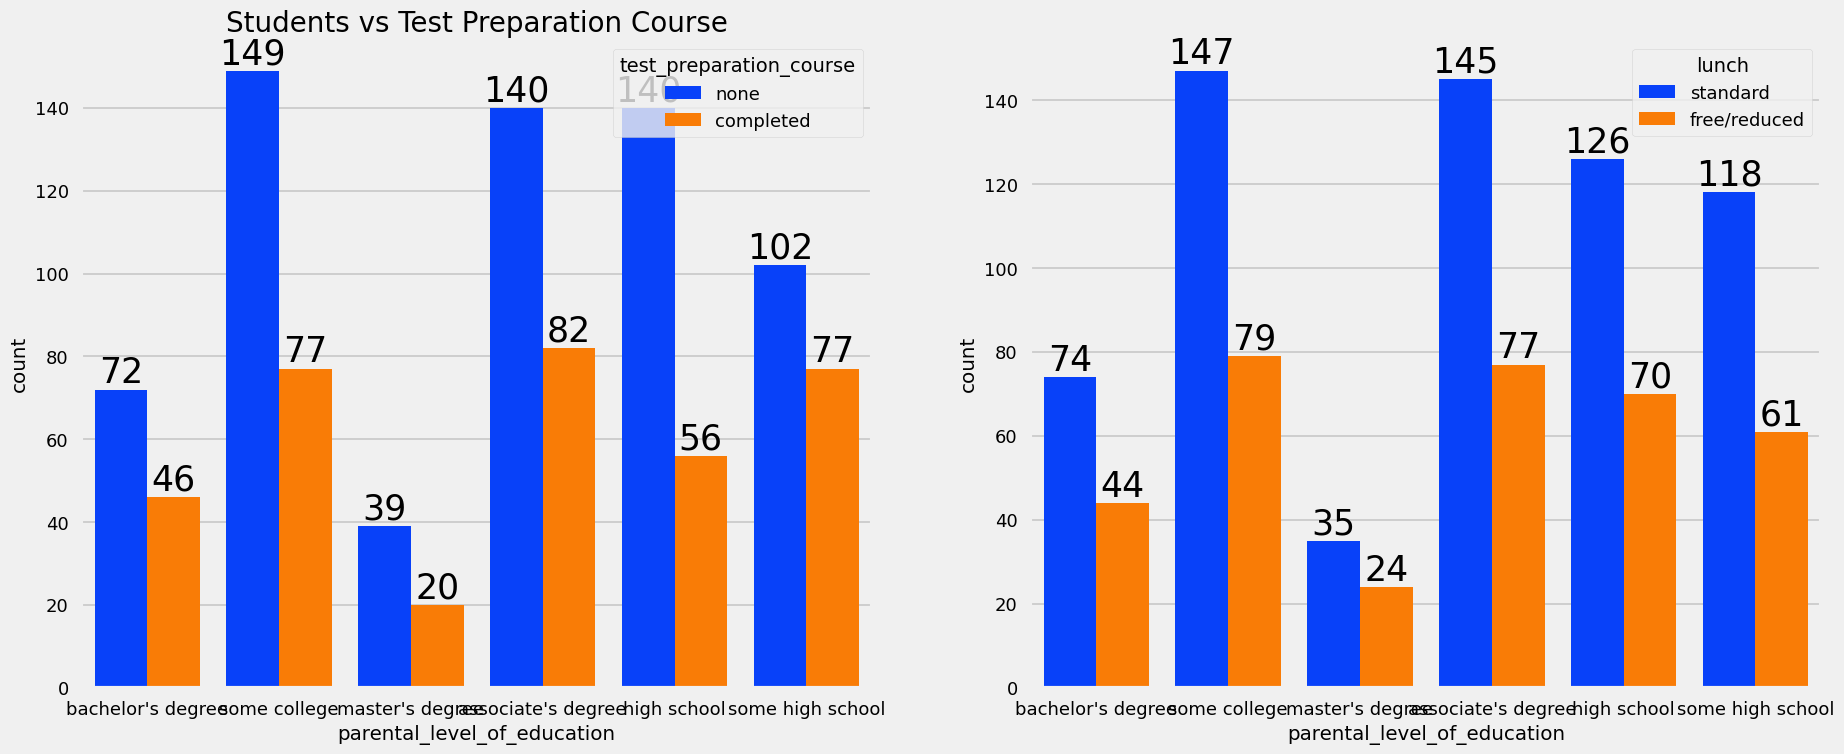

In [97]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.countplot(x=df['parental_level_of_education'],data=df,palette='bright',hue='test_preparation_course',saturation=0.95,ax=ax[0])
ax[0].set_title('Students vs Test Preparation Course',color='black',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=25)

sns.countplot(x=df['parental_level_of_education'],data=df,palette='bright',hue='lunch',saturation=0.95,ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=25)


#### Insights
*   Students who got standard lunch perform well than those who got free lunch.

#### Test Preparation Column
*   Which type of lunch is most common among students?
*   Does test preparation course have any impact on student performance?

##### Bivariate Analysis (Does test preparation course have any impact on student performance?)

<Axes: xlabel='lunch', ylabel='writing_score'>

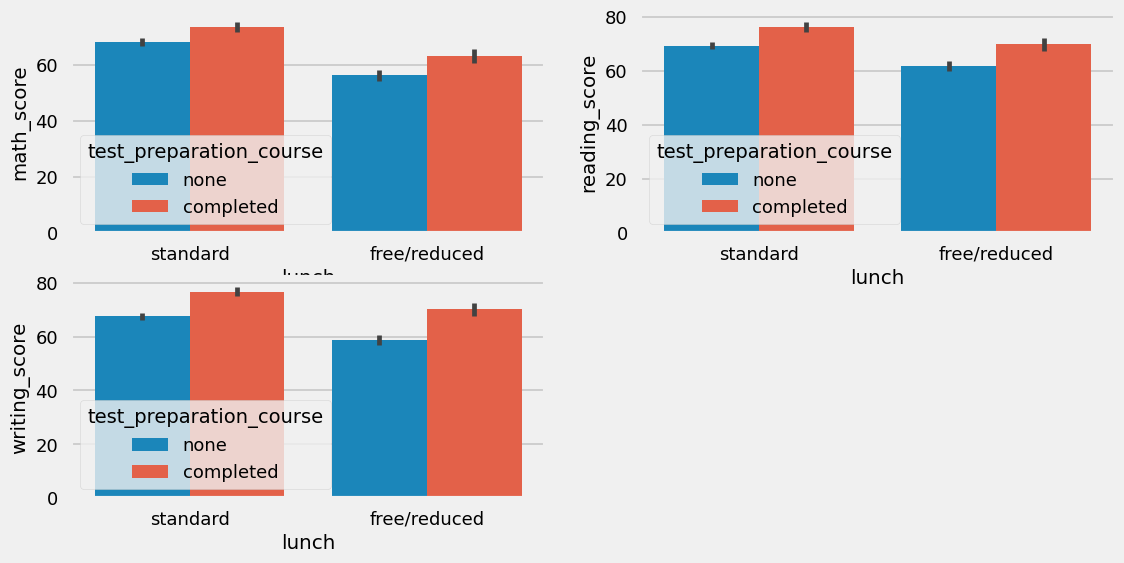

In [98]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.barplot(x=df['lunch'],y=df['math_score'],hue=df['test_preparation_course'])
plt.subplot(2,2,2)
sns.barplot(x=df['lunch'],y=df['reading_score'],hue=df['test_preparation_course'])
plt.subplot(2,2,3)
sns.barplot(x=df['lunch'],y=df['writing_score'],hue=df['test_preparation_course'])

#### Insight
*   Students who have completed test preparation course have higher score than those who dont.

#### Checking Outlier

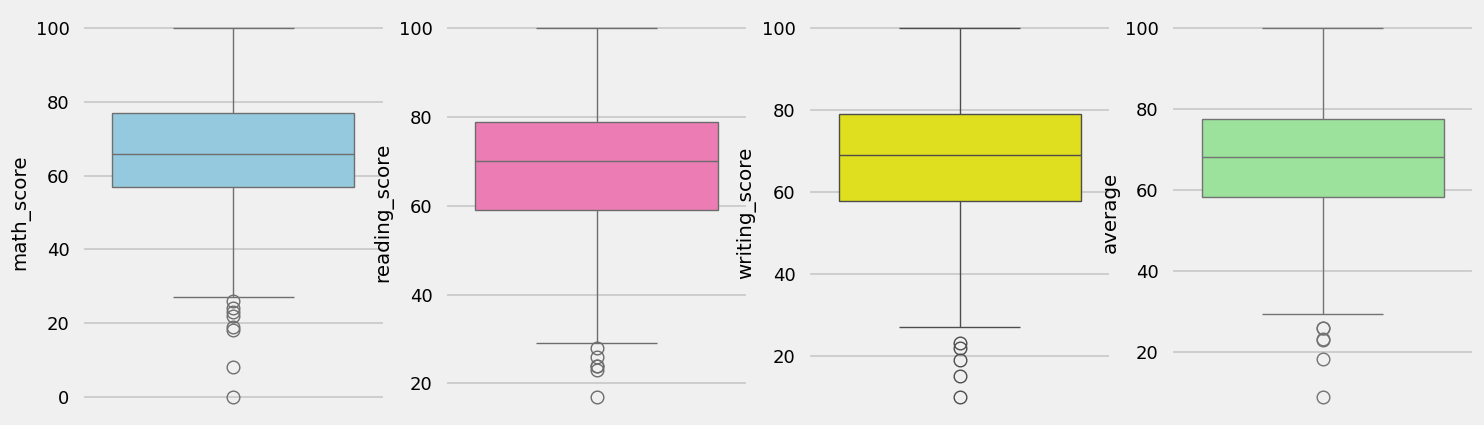

In [100]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average'],color='lightgreen')
plt.show()

#### Multivariate Analysis using pairplot

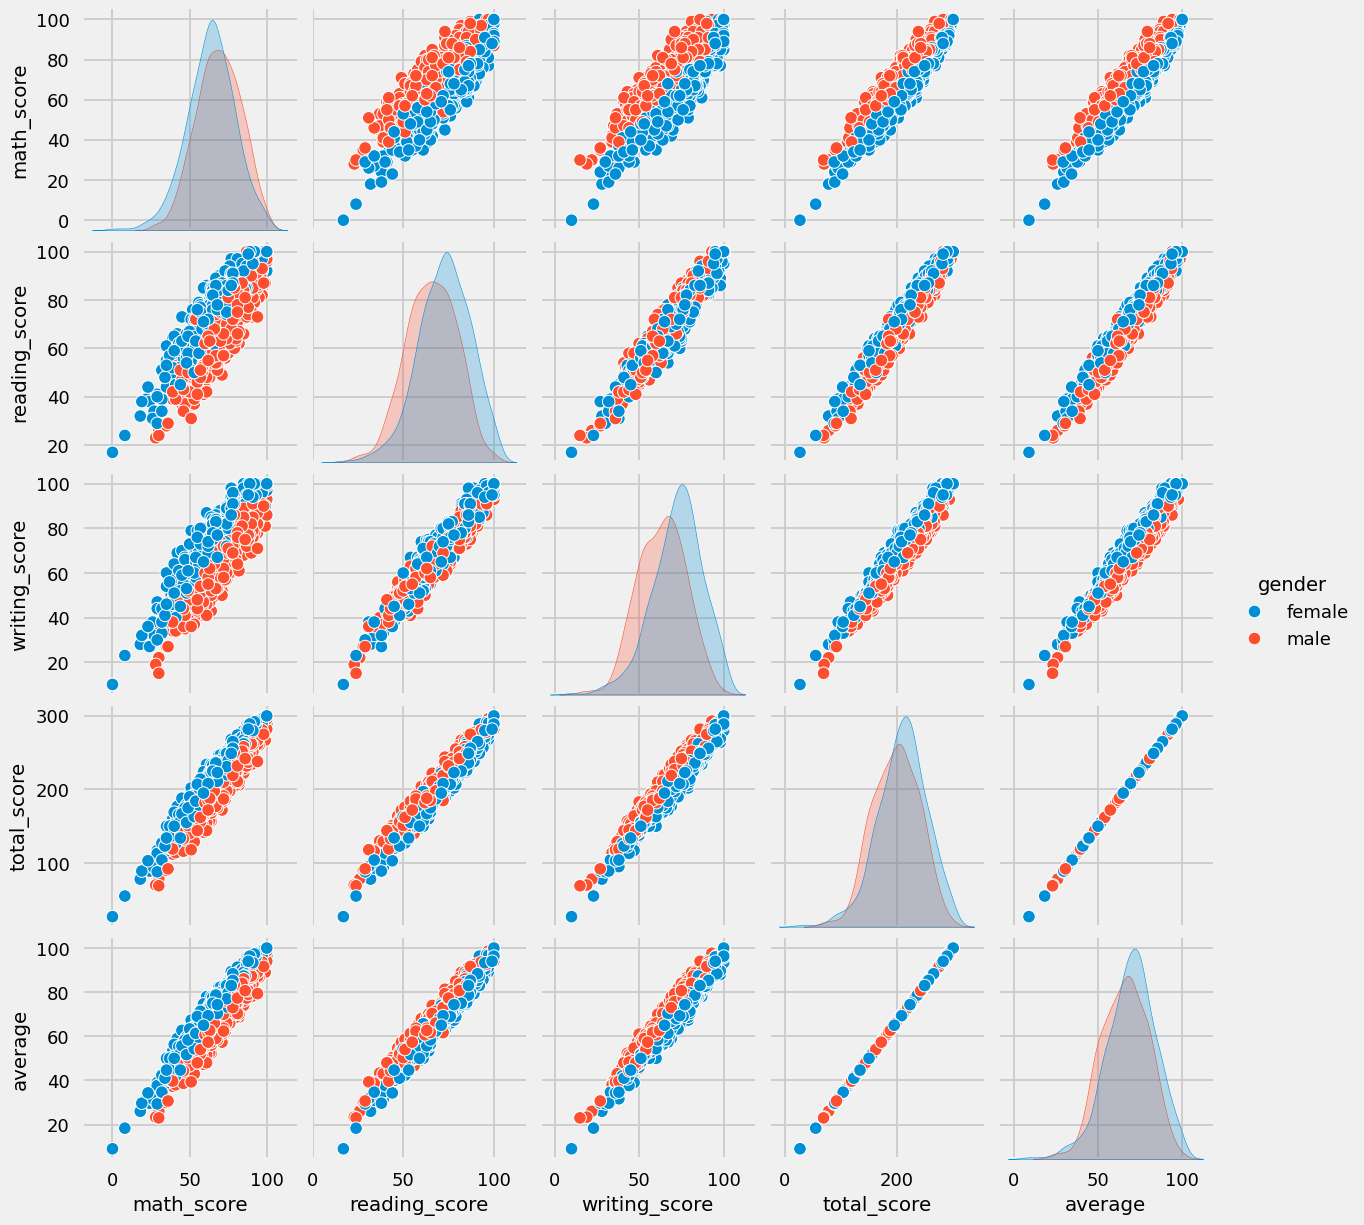

In [102]:
sns.pairplot(df,hue='gender')
plt.show()

#### Insights
*   From the above it is clear that all the scores increase linearly with each other.

### Conclusion
*   Student performance is related to their lunch, race and parental level of education.
*   Female lead in top scores and also are top scorers.
*   Students performance course is not much related to their test preparation course.
*   But finishing test preparation course is beneficial.

In [103]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333
